<a href="https://colab.research.google.com/github/AURORARISE/MSSP-6070/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

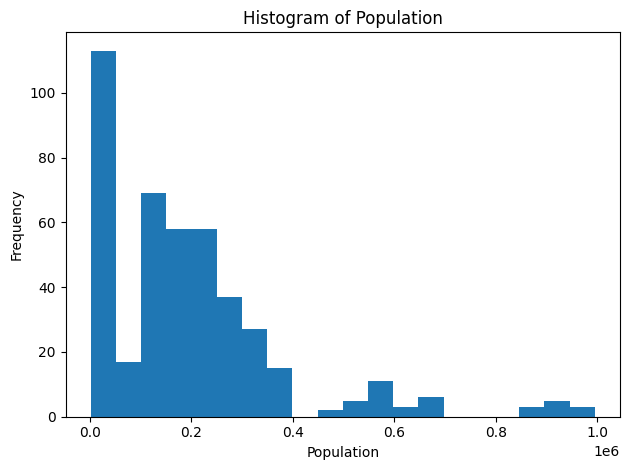

(Population    196841.138889
 dtype: float64,
 Population    188530.060266
 dtype: float64,
 {'Population': (np.float64(0.818588713775323),
   np.float64(1.01417054815526e-21))},
 {'Population': 21})

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('/content/drive/MyDrive/MSSP6070/a. Assignments/Assignment4/Population.csv')

numeric_cols = df.select_dtypes(include=[np.number])

means = numeric_cols.mean()
stds = numeric_cols.std()

normality_results = {}
for col in numeric_cols.columns:
    stat, p = stats.shapiro(numeric_cols[col].dropna())
    normality_results[col] = (stat, p)

for col in numeric_cols.columns:
    plt.figure()
    plt.hist(numeric_cols[col].dropna(), bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

outliers = {}
for col in numeric_cols.columns:
    q1 = numeric_cols[col].quantile(0.25)
    q3 = numeric_cols[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    outliers[col] = numeric_cols[(numeric_cols[col] < lower) | (numeric_cols[col] > upper)][col]

means, stds, normality_results, {col: outliers[col].shape[0] for col in numeric_cols.columns}